## K-menas on Iris dataset and performance measure

### There are three main criteria to successfully apply k-means to clustering problems.
#### 1. The cluster number k: To determine the best value for k is not trivial and we need to run k-means with several k values and choose the one that makes most sense to us. 
#### 2. Clusters are isotropic (i.e. symmetrical), meaning that they are uniform in all directions and the edges curve outward. 
#### 3.Similar variance: K-means also assumes all clusters have similar variance.


In [3]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from matplotlib.patches import Patch
import matplotlib.patches as patches
import math
import numpy as np
from numpy import percentile
from numpy.random import seed
import os
import datetime
import time
import re
import pandas as pd
from sqlalchemy import create_engine
import seaborn as sns

In [4]:
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn import datasets, metrics

In [5]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100) 
pd.set_option('display.max_colwidth', -1) 

In [6]:
# Loading the data from Sklearn's datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Computing the first principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Split the data into four equally-sized samples. First we break it in half:
X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_std,
    X_pca,
    test_size=0.5)#,
    #random_state=13579)

In [7]:
# Data frame to store features and predicted cluster memberships.
ypred = pd.DataFrame()

# Pass a list of tuples and a counter that increments each time we go
# through the loop. The tuples are the data to be used by k-means,
# and the PCA-derived features for graphing. We use k-means to fit a
# model to the data, then store the predicted values and the two-feature
# PCA solution in the data frame.
for counter, data in enumerate([
    (X_half1, X_pcahalf1),
    (X_half2, X_pcahalf2)]):
    
    
    # Put the features into ypred.
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Generate cluster predictions and store them for clusters 2 to 4.
    for nclust in range(2, 5):
        pred = KMeans(n_clusters=nclust, random_state=123).fit_predict(data[counter])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred

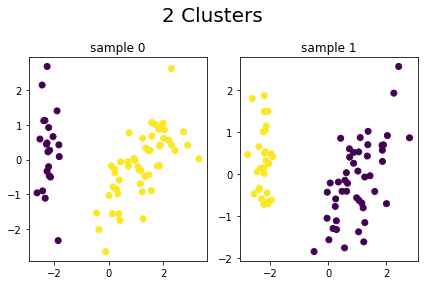

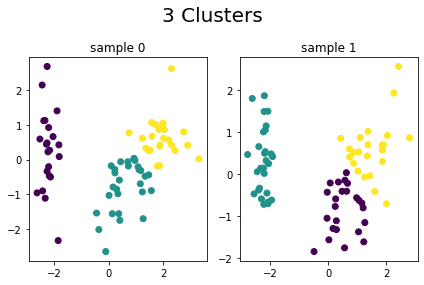

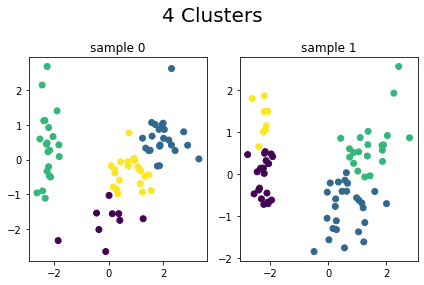

In [8]:
 #For each  number of clusters, plot the clusters using the
# pca features for each sample.
for cluster in range(2, 5):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(1, 2)
    
    # Make a plot for each sample.
    for i in range(2):
        
        # PCA-created features.
        x_sub = ypred['pca_f1_sample{}'.format(i)]
        y_sub = ypred['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments.
        c = ypred['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        axarr[i].scatter(x_sub, y_sub, c=c)
        axarr[i].set_title('sample {}'.format(i))
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')

In [9]:
labels = KMeans(n_clusters=3, random_state=123).fit_predict(X_std)
print(metrics.silhouette_score(X_std, labels, metric='euclidean'))

0.45994823920518635


In [12]:
for s in range (2,5):
    labels = KMeans(n_clusters=s, random_state=123).fit_predict(X_std)
    print(metrics.silhouette_score(X_std, labels, metric='euclidean'))

0.5817500491982808
0.45994823920518635
0.383850922475103


In [11]:
from sklearn.cluster import AgglomerativeClustering
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                      n_clusters=3)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

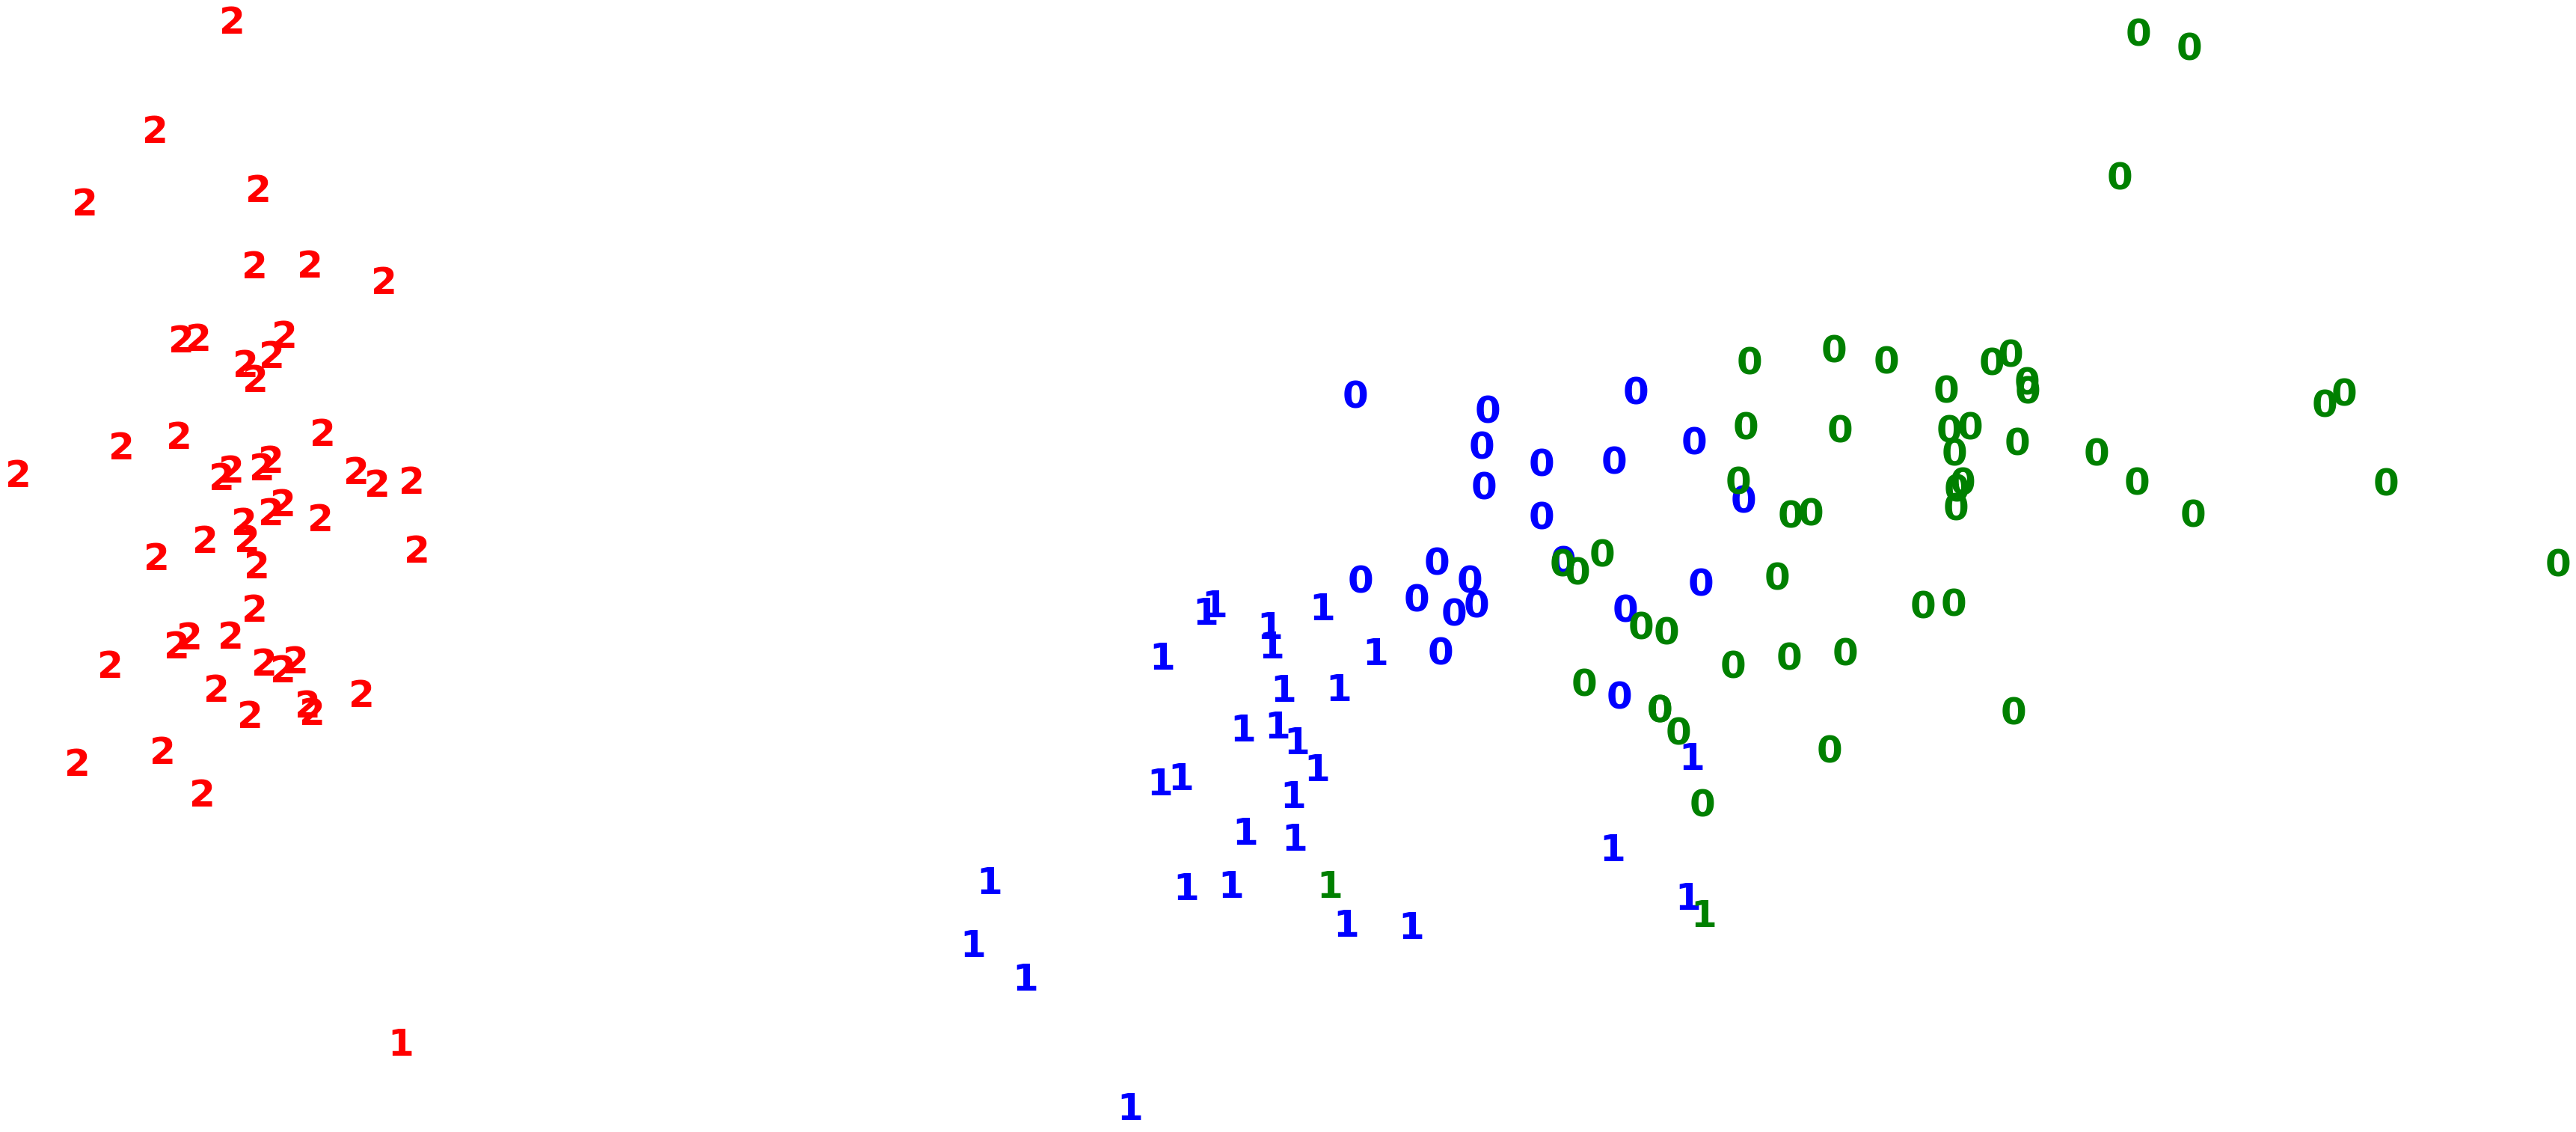

In [13]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage 

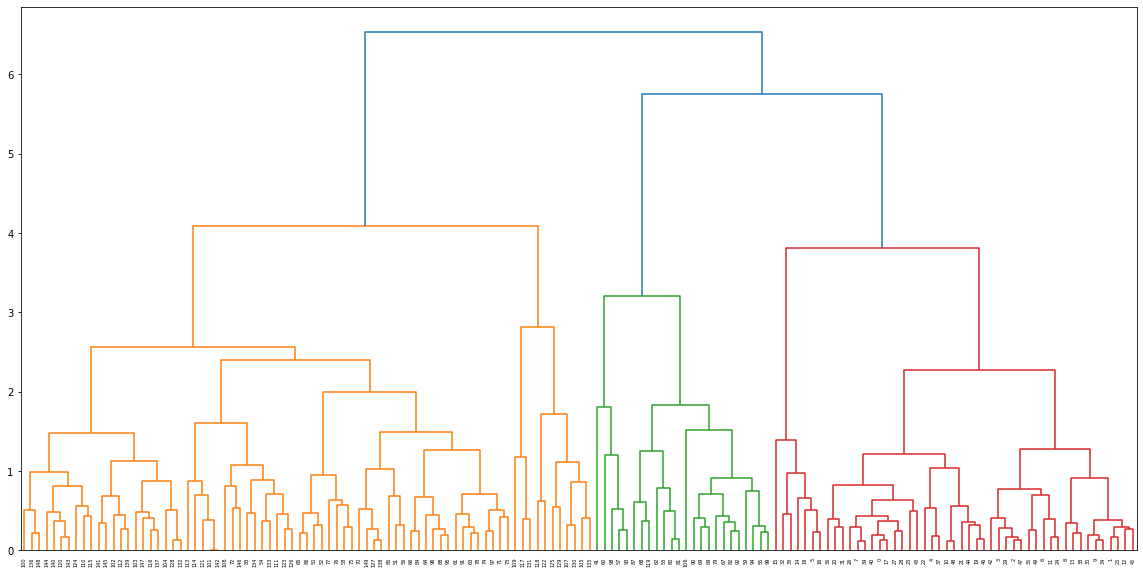

In [17]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='complete'))
plt.show()

In [14]:
print("Adjusted Rand Index of the Agglomerative Clustering solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhoutte score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

Adjusted Rand Index of the Agglomerative Clustering solution: 0.6334862915668319
The silhoutte score of the Agglomerative Clustering solution: 0.44662483949372017


## Create a pipeline 

In [34]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std_pca = PCA(n_components=2).fit_transform(X_std)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026D32074908>,
      dtype=object)

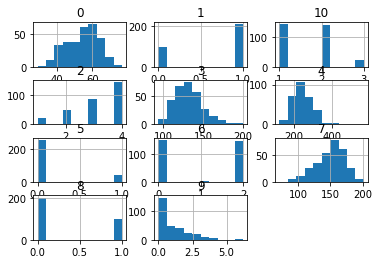

In [37]:
# Get all numerica columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
X_num = X.select_dtypes(include=numerics)
num_cols = X_num.columns
# Plot all of them
X[num_cols].hist()

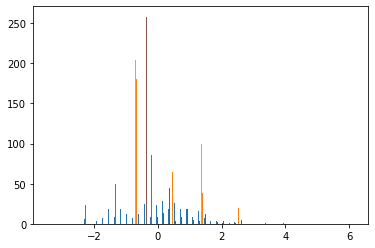

In [38]:
# Show the same but standardized
plt.hist(X_std, bins='auto')
plt.show() 

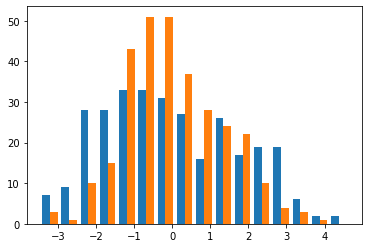

In [40]:
# Show the same but standardized and PCA fitted
plt.hist(X_std_pca, bins='auto')
plt.show() 

### Focus on only two PCAs so make it possible to plot the results

In [42]:
# Defining the k-means
kmeans_cluster = KMeans(n_clusters=2, random_state=123)

# Fit model
%timeit kmeans_cluster.fit(X_std_pca)
y_pred = kmeans_cluster.predict(X_std_pca)

21.9 ms ± 854 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [43]:
y_pred.shape, X_std_pca.shape

((303,), (303, 2))

In [44]:
X_std_pca.shape[0]

303

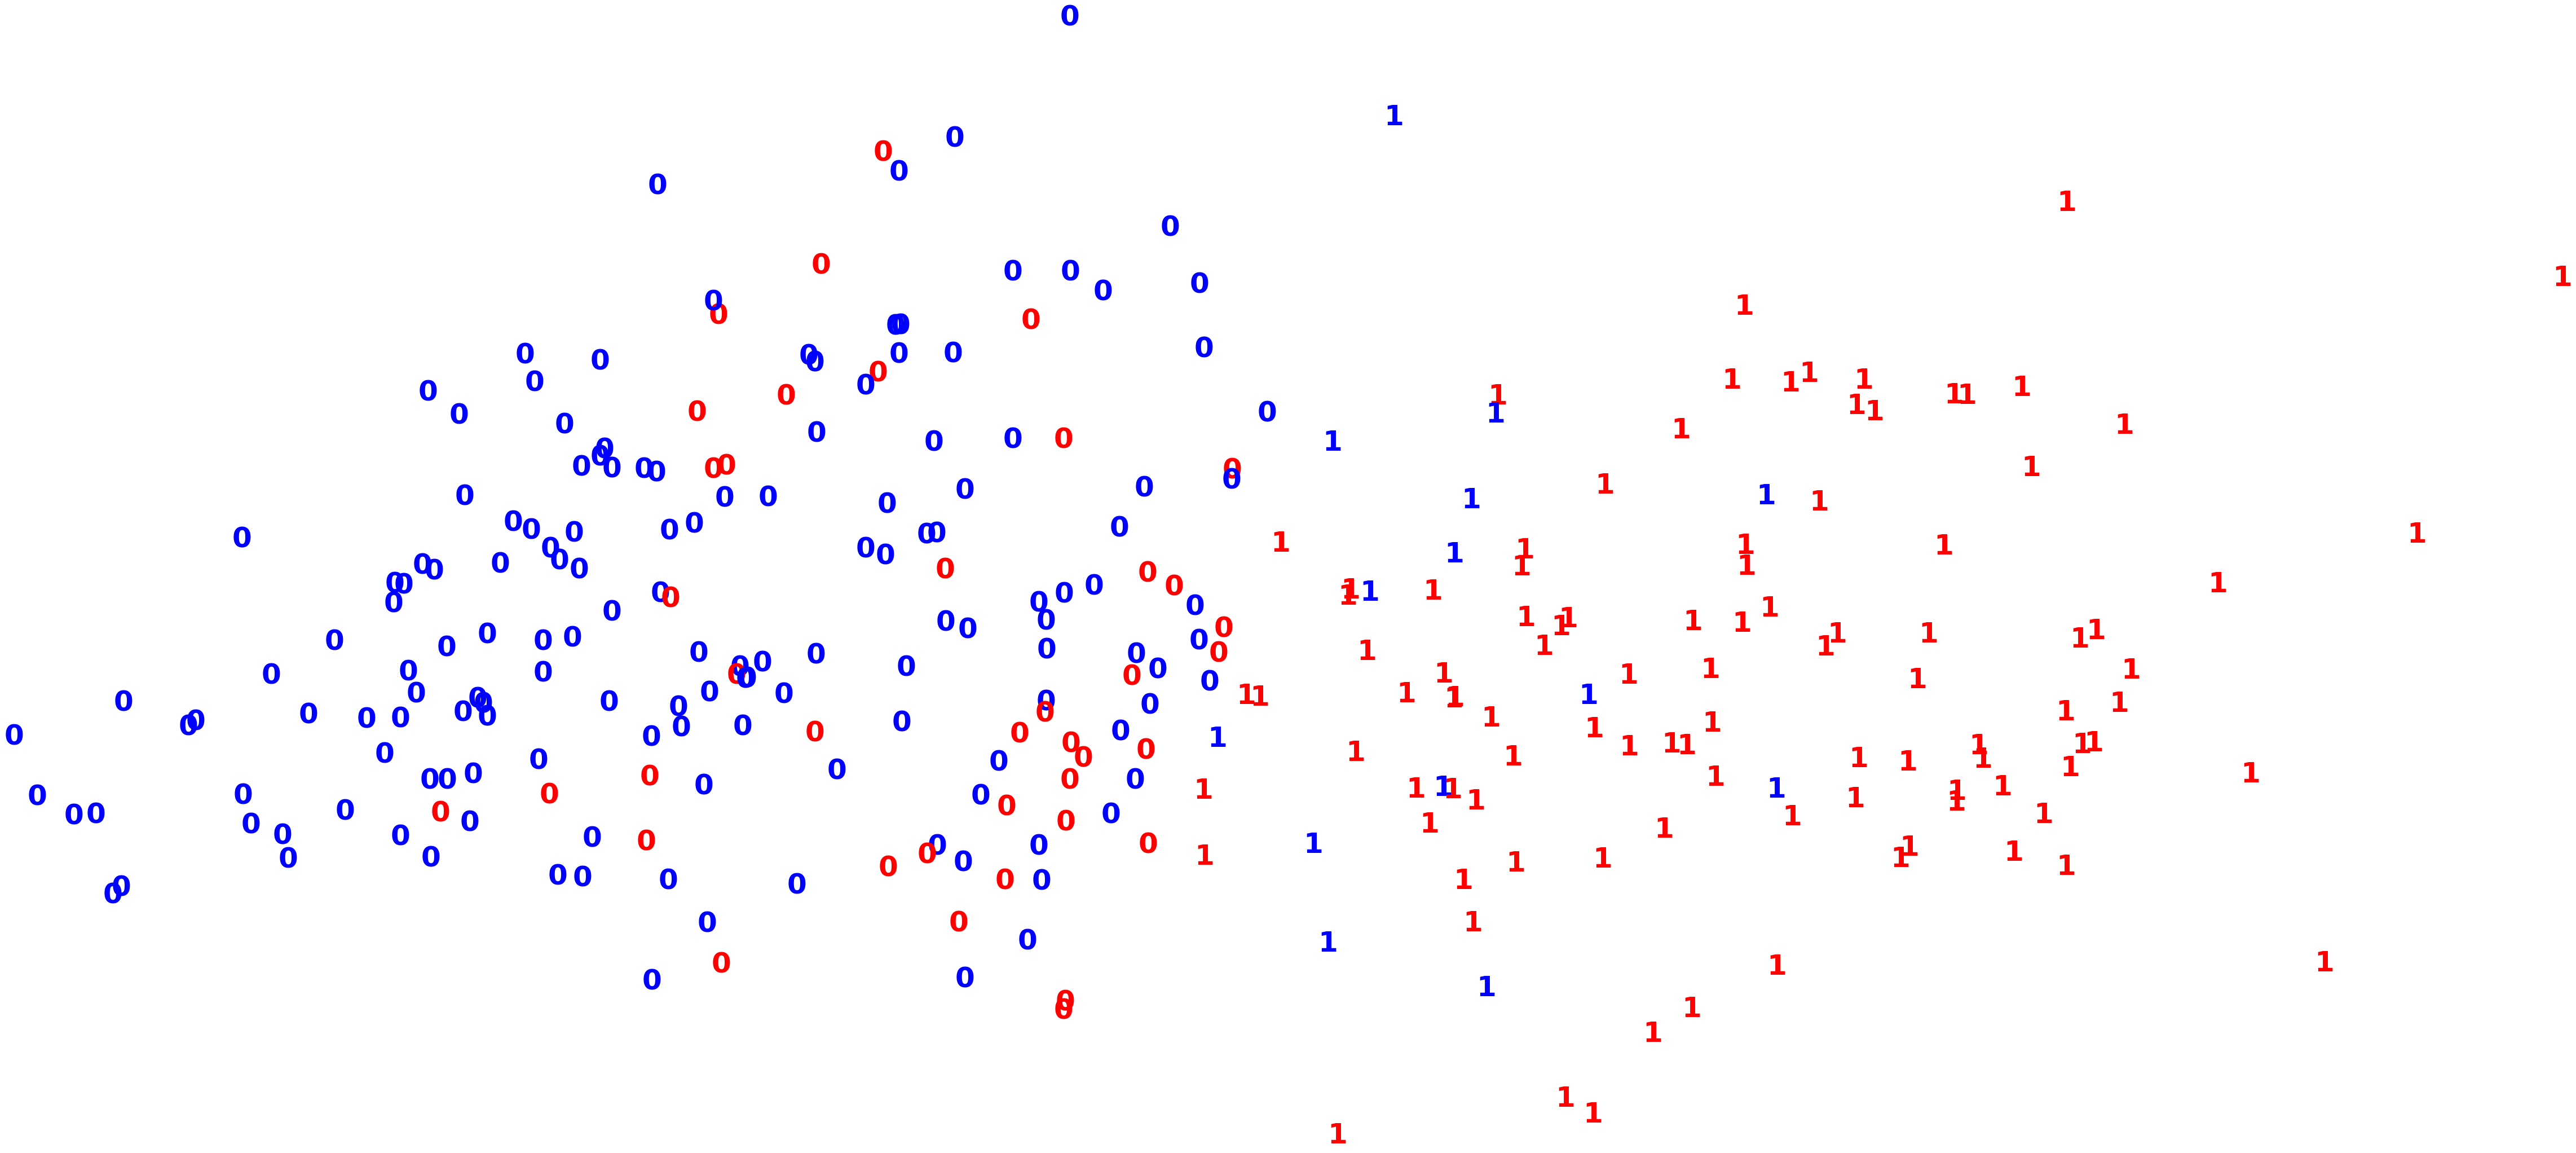

In [45]:
#pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(X_std_pca.shape[0]):
    plt.text(X_std_pca[i, 0], X_std_pca[i, 1], str(y_pred[i]),
             color=colours[Y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()